<a href="https://colab.research.google.com/github/Tanish-Aravind/CODING-SAMURAI-INTERNSHIP-TASK/blob/main/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean cross-validation accuracy: 0.9783
Prediction for sample digit at index 36001 is '2': True


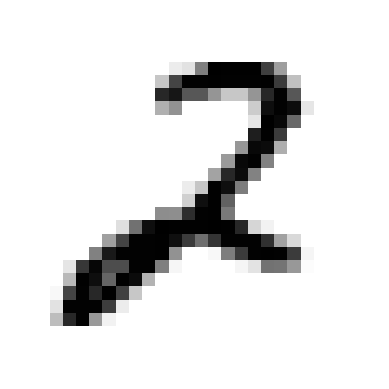

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST data as arrays
mnist = fetch_openml('MNIST_784', as_frame=False, parser='auto')
x, y = mnist['data'].astype(np.float32), mnist['target'].astype(np.uint8)

# Split into train and test sets
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

# Shuffle training set
shuffle_idx = np.random.permutation(len(x_train))
x_train, y_train = x_train[shuffle_idx], y_train[shuffle_idx]

# Create binary target for digit '2'
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

# Build optimized pipeline
clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        solver='liblinear',
        max_iter=1000,
        tol=1e-3,
        C=0.5,
        random_state=42,
        warm_start=True
    )
)

# Parallel cross-validation
scores = cross_val_score(
    clf,
    x_train,
    y_train_2,
    cv=5,
    scoring="accuracy",
    n_jobs=-1  # Enable parallel processing
)
print(f"Mean cross-validation accuracy: {scores.mean():.4f}")

# Fit final model
clf.fit(x_train, y_train_2)

# Predict sample digit
some_digit = x[36001].reshape(1, -1)
prediction = clf.predict(some_digit)
print(f"Prediction for sample digit at index 36001 is '2': {bool(prediction)}")

# Plot the sample digit
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary', interpolation='nearest')
plt.axis('off')
plt.show()
